Cyclistic Bike-Share Q3-2023 Analysis Project


A Google Data Analytics Professional Certificate Capstone Project.
This analysis is for case study 1 from the Google Data Analytics Certificate (Cyclistic). It’s originally based on the
case study “‘Sophisticated, Clear, and Polished’: Divvy and Data Visualization” written by Kevin Hartman (found here:https://artscience.blog/home/divvy-dataviz-case-study (https://artscience.blog/home/divvy-dataviz-casestudy)). . We will be using the Divvy dataset for the case study.

***ASK***

The purpose of this script is to consolidate downloaded Q3-2023 Divvy data into a single dataframe and then
conduct simple analysis to help answer the key question:
“In what ways do member and casual riders use Divvy bikes differently?”

key Stakeholders:

Cyclistic Executive Team,
Cyclistic Director of Marketing (Lily Moreno),
Cyclistic Marketing Analytics Team

***PREPARE***

Setting up my environment
Notes: Setting up my R environment by loading the following required packages

In [ ]:
library(tidyverse)
library(janitor)
library(tidyr)
library(lubridate) 
library(ggplot2)

Collect data

Uploading 3 separate Cyclistic’s datasets (csv files) source: Index of bucket "divvy-tripdata"

ROCCC approach was implemented to determine the credibility of the data.

Reliable- the data has been verified and is accurate, represents all bike rides for the Q3 2023.

Original – the data is made available by Motivate International Inc. under the following license: Data License Agreement | Divvy Bikes.

Comprehensive- The datasets include all the bike ride details such as time, distance, station ID, membership type, etc.

Current-  The Third Quarter of 2023 includes the latest data available at the time this report mas made.

Cited- The data is cited under the data license agreement.

In [ ]:
jul23_df <- read.csv("C:/Users/ronin/Desktop/Q3 2023 data/Divvy_tripdata_07_2023.csv")
aug23_df <- read.csv("C:/Users/ronin/Desktop/Q3 2023 data/Divvy_tripdata_08_2023.csv")
sep23_df <- read.csv("C:/Users/ronin/Desktop/Q3 2023 data/Divvy_tripdata_09_2023.csv")

***PROCESS***

Wrangle and Cleaning the data frame

As the data was being cleaned, it was noted that some of the data is missing specially in the “start and end station names and IDs” this could potentially hinder my ability to perform a thorough analysis; nonetheless, the data was clean and ready for its analysis. 

Combining individual month datasets into a single data frame


In [ ]:
usage <- rbind(jul23_df,aug23_df, sep23_df)

Remove empty spaces, nulls, duplicates

In [ ]:
usage <- janitor::remove_empty(usage,which = c("cols"))
usage <- janitor::remove_empty(usage,which = c("rows"))
usage <- usage[!(usage$ride_length <=0),] 

Creating dataframe eliminating unnecessary columns

In [ ]:
usage <- usage %>% 
select(-c(start_lat, end_lat, start_lng, end_lng))

Add data to prepare for analysis
convert date/timestamp chr format to dttm format

In [ ]:
usage$started_at <- lubridate::mdy_hm(usage$started_at) 
usage$ended_at <- lubridate::mdy_hm(usage$ended_at)

Create dataframe containing new columns (date, month, day, and year for each ride)


In [ ]:
usage$date <- as.Date(usage$started_at)
usage$month <- format(as.Date(usage$date), "%m")
usage$day <- format(as.Date(usage$date), "%d")
usage$year <- format(as.Date(usage$date), "%Y")
usage$day_of_week <- format(as.Date(usage$date), "%A")


Add a “ride_length” calculation to usage (in seconds)


In [ ]:
usage$ride_length <- difftime(usage$ended_at, usage$started_at, unit = c("secs"))

Convert “ride_length” from factor to numeric to run calculations on data

In [ ]:
is.factor(usage$ride_length)

In [ ]:
usage$ride_length <- as.numeric(as.character(usage$ride_length))
is.numeric(usage$ride_length)

Remove “bad” data by creating a new version of the dataframe (v2)

In [ ]:
usage_v2 <- usage[!(usage$start_station_name == "HQ QR" | usage$ride_length<0),]


***ANALYZE***

Descriptive analysis
Descriptive analysis on ride_length (all figures in seconds)

In [ ]:
mean(usage_v2$ride_length) #straight average (total ride length / rides)
median(usage_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(usage_v2$ride_length) #longest ride
min(usage_v2$ride_length) #shortest ride

Compare member and casual riders

In [ ]:
aggregate(usage_v2$ride_length ~ usage_v2$member_casual, FUN = mean)
aggregate(usage_v2$ride_length ~ usage_v2$member_casual, FUN = median)
aggregate(usage_v2$ride_length ~ usage_v2$member_casual, FUN = max)
aggregate(usage_v2$ride_length ~ usage_v2$member_casual, FUN = min)


Set days in order

In [ ]:
usage_v2$day_of_week <- ordered(usage_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


Average ride time by each day for member vs casual users

In [ ]:

aggregate(usage_v2$ride_length ~ usage_v2$member_casual + usage_v2$day_of_week, FUN = mean)


Analyze ridership data by type and weekday

In [ ]:
usage_v2 %>% 
 mutate(day_of_week = wday(started_at)) %>% 
 group_by(member_casual, day_of_week) %>%
 summarise(number_of_rides = n()
 ,average_duration = mean(ride_length)) %>% 
 arrange(member_casual, day_of_week)


in order to visualize the busiest hour by rider type, an "hour" column has to be added

In [ ]:
usage_v2$hour <- hour(usage_v2$started_at)


Analysis summary

After analyzing the differences between annual members and casual riders, I have found that annual members have a longer ride duration and cover more distance (on average) especially during weekdays compared to casual riders. Casual riders’ average ride length is more than twice of that of members throughout the week, especially on Saturday and Sundays, this leads me to believe that casual riders use bike share more for leisure than for communing. It has also come to my attention that the most popular bike for both types of riders is the classic, rather than electric; at the same time, the busiest time for both riders is at 5 pm.

***SHARE***

Visualizing

Number of rides by rider type and busiest weekday

In [ ]:
my_colors <- RColorBrewer::brewer.pal(8, "Dark2")[6:7]
usage_v2 %>% 
 mutate(day_of_week = wday(started_at)) %>% 
 group_by(member_casual, day_of_week) %>%
 summarise(number_of_rides = n()
 ,average_duration = mean(ride_length)) %>% 
 arrange(member_casual, day_of_week) %>% 
 ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
 geom_col(position = "dodge") +
 scale_fill_manual(values = my_colors)


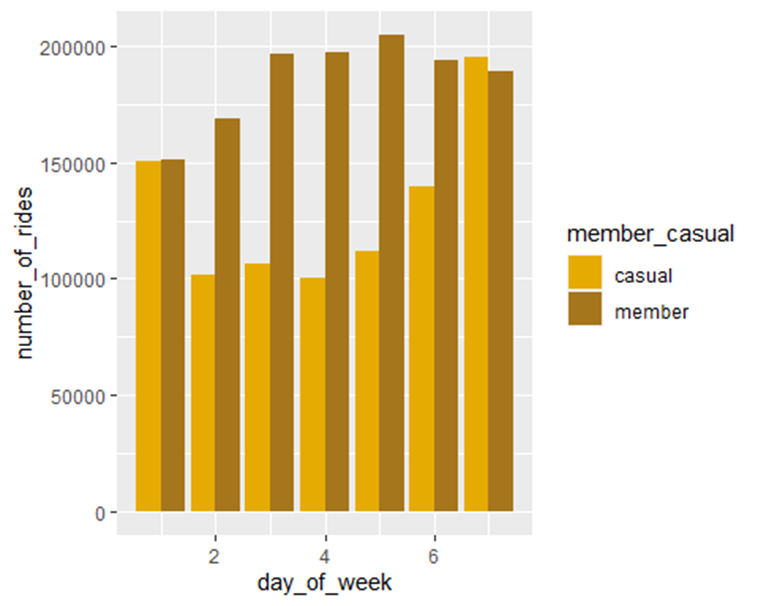

Average duration by rider type

In [ ]:
my_colors <- RColorBrewer::brewer.pal(8, "Dark2")[6:7]
usage_v2 %>% 
 mutate(day_of_week = wday(started_at)) %>% 
 group_by(member_casual, day_of_week) %>%
 summarise(number_of_rides = n()
 ,average_duration = mean(ride_length)) %>% 
 arrange(member_casual, day_of_week) %>% 
 ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
 geom_col(position = "dodge") +
 scale_fill_manual(values = my_colors)



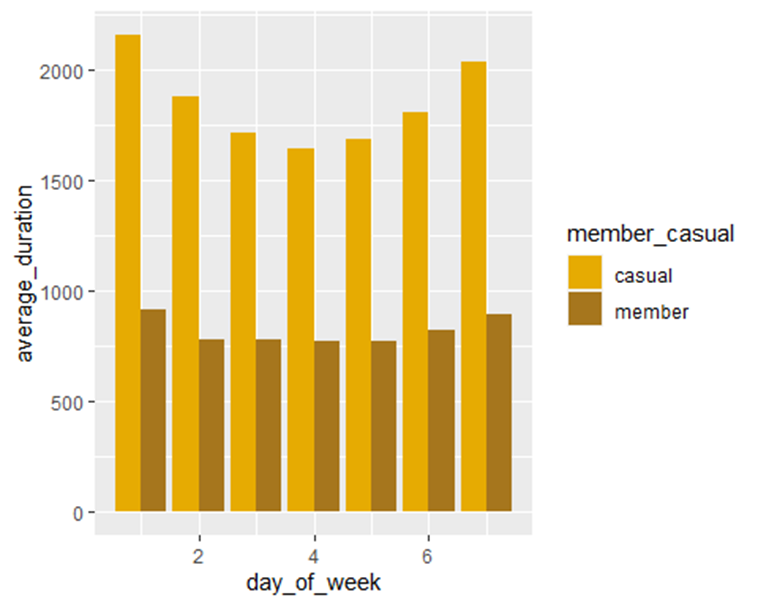

Total rides and preferred bicycle by rider type

In [ ]:

my_colors <- RColorBrewer::brewer.pal(8, "Dark2")[6:7]
usage_v2 %>% 
 group_by(rideable_type, member_casual) %>% 
 summarize(number_of_trips = n())%>%
 ggplot(aes(x = rideable_type, y = number_of_trips, fill = member_casual)) +
 geom_bar(stat = 'identity') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  scale_fill_manual(values = my_colors)
 


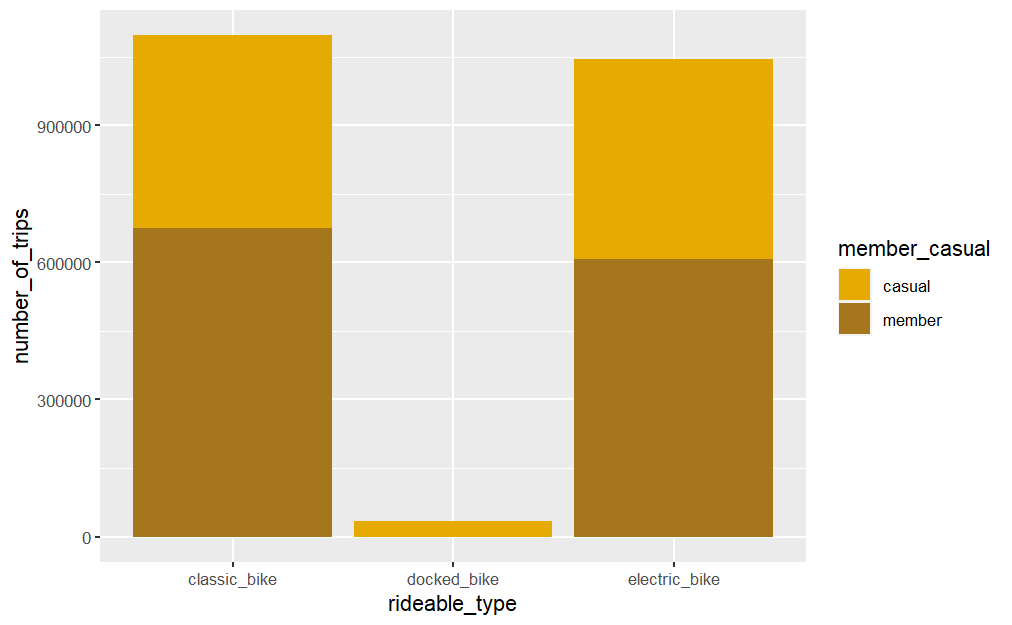

busiest hour by rider type

In [ ]:
my_colors <- RColorBrewer::brewer.pal(8, "Dark2")[6:7]
usage_v2 %>% 
 mutate(day_of_week = wday(started_at)) %>% 
 group_by(member_casual, hour) %>%
 summarise(number_of_rides = n()
 ,average_duration = mean(ride_length)) %>% 
 arrange(member_casual, hour) %>% 
 ggplot(aes(x = hour, y = number_of_rides, fill = member_casual)) +
 geom_col(position = "dodge") +
 scale_fill_manual(values = my_colors)


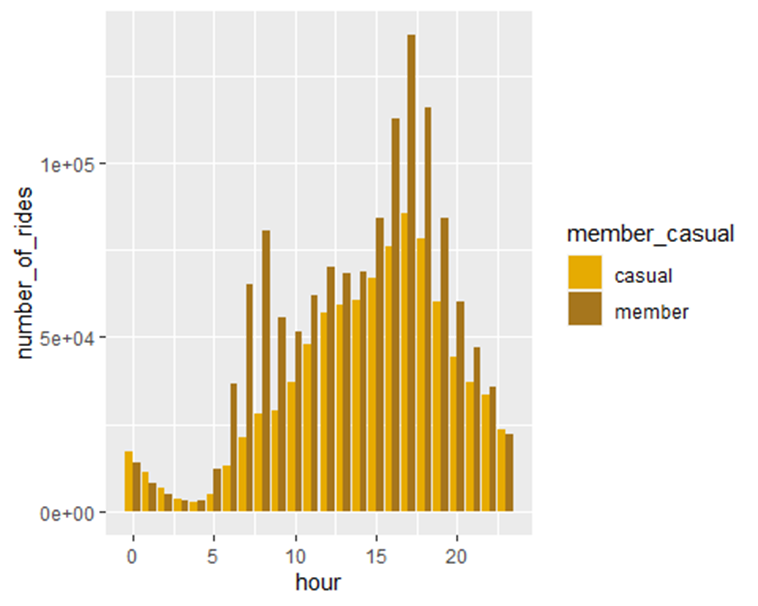

Export summary file for further analysis

In [ ]:
counts <- aggregate(usage_v2$ride_length ~ usage_v2$member_casual + usage_v2$day_of_week, FUN = mean)
write.csv(counts, file = "C:\\Users\\ronin\\Desktop\\2023-Q3\\cyclistic_Bike-Share_ Q3-2023_analysis.csv", row.names = FALSE)


##### ***ACT***

To answer Lily Moreno's assigned question: In what ways do member and casual riders use Divvy bikes differently? I have come to the following conclusion.

Conclusion

This report confirms that in the third quarter of 2023 member riders have a longer ride duration as shown in bar charts, while casual riders use the bikes more for leisure than for commuting. Given its recent strategic initiatives, I expect Cyclistic Bike-Share to strengthen its market share, they offer excellent products and services at accessible rates. The review of the latest Q3 2023 report, as well as the analysis of the data reveals that Cyclistic Bike-Share has continued to prosper and expand immensely as a result of its successes. Furthermore, by looking at the “busiest hour by rider type” bar chart, we can see that member and casual riders use the bikes throughout the whole week regardless of the pick hours of usage.
Complete data under the “start station and end station, names and IDs” could enhance this report as this information is critical to evaluate the feasibility to establish new bike stations or remove those that are hardly used. Further analysis would have to be conducted. These findings can help Lily Moreno implement different marketing strategies and initiatives to promote and convert casual riders into annual riders. Cyclistic Bike-Share continues to enhance the Bike-Share industry everyday and can be expected to remain a household name for many years to come.
